To-do:

1. create single symmetrical co-occurrence matrix (with general semantic embeddings)
2. determine target/landmark pairings from this matrix 
3. visualize object clusters
4. compare clusters across language models
5. design room

In [9]:
import numpy as np
import seaborn as sns
import pandas as pd
import gzip
import fastparquet
import matplotlib.pyplot as plt
import tensorflow as tf
import gensim.downloader as api
from sklearn import cluster, manifold
from mpl_toolkits.mplot3d import axes3d


In [2]:
model = api.load('conceptnet-numberbatch-17-06-300')

In [3]:
# finalize object list
objects = pd.read_excel('post_objects.xlsx', header=None)

In [4]:
# create cooccurrence matrix 
word_vecs = np.zeros((len(objects), len(model.get_vector(objects.iloc[0][0]))))
cooccur = np.zeros((len(objects),len(objects)))

for i in range(len(objects)):
    
    word_vecs[i,:] = model.get_vector(objects.iloc[i][0])
    
    for j in range(len(objects)):
        
        cooccur[i,j] = model.similarity(objects.iloc[i][0],objects.iloc[j][0])


In [58]:
# cluster word vectors
clusters = cluster.KMeans(n_clusters = 7).fit(word_vecs)


In [21]:
# manifold learning
mani_scaling = manifold.MDS(n_components=8)
word_scaling = mani_scaling.fit_transform(word_vecs)


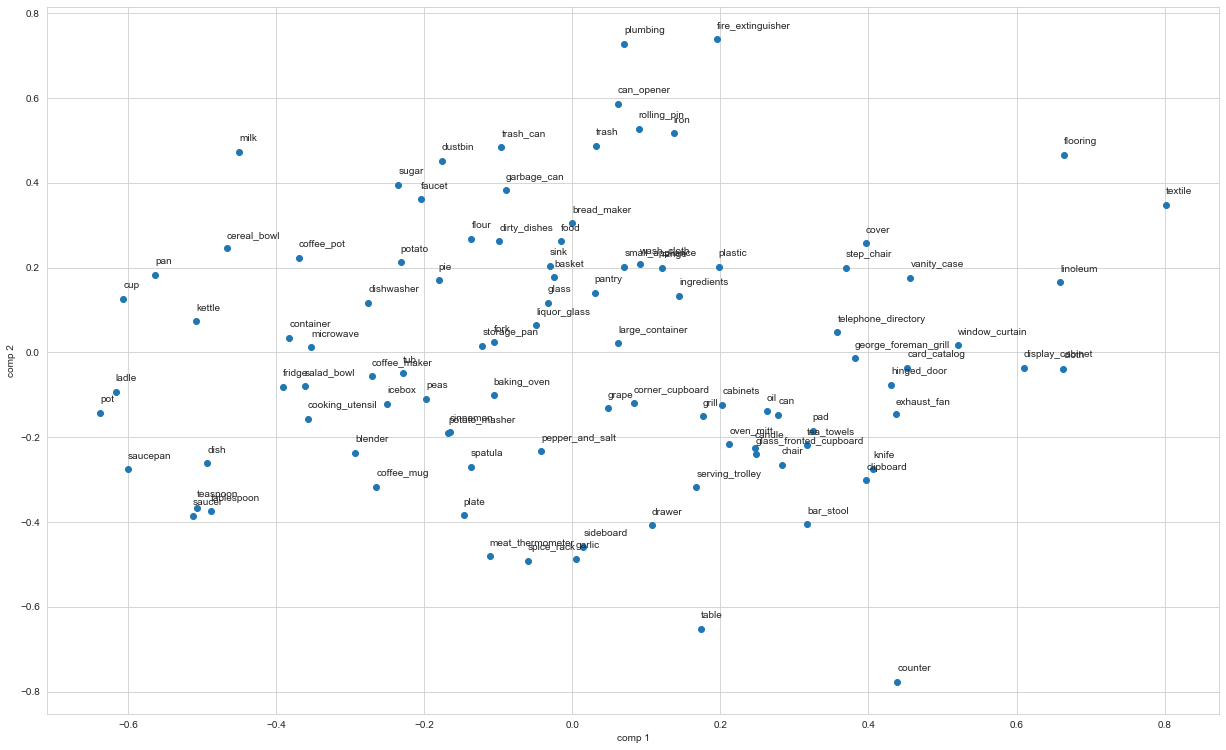

In [25]:
# visualize in 3d
sns.set_style("whitegrid")

fig = plt.figure(figsize=(21,13))
ax = fig.add_subplot()
#ax = fig.add_subplot(projection = '3d')

x = word_scaling[:,0]
y = word_scaling[:,1]
#z = word_scaling[:,2]

ax.set_xlabel("comp 1")
ax.set_ylabel("comp 2")
#ax.set_zlabel("comp 3")

ax.scatter(x, y)
#ax.scatter(x, y, z)

for i in range(len(objects)):
    
    ax.text(word_scaling[i,0],word_scaling[i,1]+0.025,objects.iloc[i][0][6:])
    # ax.text(word_scaling[i,0],word_scaling[i,1]+0.025,word_scaling[i,2],objects.iloc[i][0][6:])

plt.show()


In [11]:
# determine target landmark pairings
num_targets = []

for i in range(len(landmarks)):
    num_targets.append(sum(pair.landmark == landmarks[i]))
    
print(num_targets)

[9, 2, 15, 13, 4, 9]


In [12]:
pair['target'][pair['landmark']==landmarks[5]]

11          crab
15           fan
23    ingredient
24          iron
25        kettle
27         maker
33           oil
36           pan
42           pot
Name: target, dtype: object

In [13]:
# design room

0    counter
1      floor
2      table
3      shelf
4       wall
5      stove
Name: landmark, dtype: object